In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Importação dos datasets


In [28]:
df_bts = pd.read_csv('processed_files/bts.csv')
df_test_alunos = pd.read_csv('processed_files/meds_test_alunos.csv')
df_train_alunos = pd.read_csv('processed_files/meds_train_alunos.csv')

Identificação de proporção de nulos e a tipagem dos dados

In [29]:
df_bts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              9 non-null      int64  
 1   id_localizacao_setor    9 non-null      int64  
 2   id_bts                  9 non-null      object 
 3   nom_bts                 9 non-null      object 
 4   num_lat_bts             9 non-null      float64
 5   num_long_bts            9 non-null      object 
 6   nom_canal_controle_bts  9 non-null      int64  
 7   num_azimuth             9 non-null      int64  
 8   id_rrsi                 9 non-null      object 
dtypes: float64(1), int64(4), object(4)
memory usage: 776.0+ bytes


In [30]:
df_test_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2904 non-null   int64  
 1   id_ponto    2904 non-null   int64  
 2   rssi_1_1    1984 non-null   float64
 3   rssi_1_2    2298 non-null   float64
 4   rssi_1_3    2084 non-null   float64
 5   rssi_2_1    2432 non-null   float64
 6   rssi_2_2    2349 non-null   float64
 7   rssi_2_3    1606 non-null   float64
 8   rssi_3_1    1868 non-null   float64
 9   rssi_3_2    2137 non-null   float64
 10  rssi_3_3    2891 non-null   float64
 11  delay_1     2904 non-null   float64
 12  delay_2     2904 non-null   float64
 13  delay_3     2904 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 317.8 KB


In [31]:
df_train_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6775 non-null   int64  
 1   id_ponto      6775 non-null   int64  
 2   rssi_1_1      4664 non-null   float64
 3   rssi_1_2      5282 non-null   float64
 4   rssi_1_3      4838 non-null   float64
 5   rssi_2_1      5646 non-null   float64
 6   rssi_2_2      5443 non-null   float64
 7   rssi_2_3      3627 non-null   float64
 8   rssi_3_1      4329 non-null   float64
 9   rssi_3_2      4977 non-null   float64
 10  rssi_3_3      6748 non-null   float64
 11  delay_1       6775 non-null   float64
 12  delay_2       6775 non-null   float64
 13  delay_3       6775 non-null   float64
 14  num_lat_bts   6775 non-null   float64
 15  num_long_bts  6775 non-null   float64
 16  flag_indoor   6775 non-null   bool   
dtypes: bool(1), float64(14), int64(2)
memory usage: 853.6 KB


Verificação de dados duplicados


In [32]:
df_train_alunos[df_train_alunos.duplicated()]

,Unnamed: 0,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,num_lat_bts,num_long_bts,flag_indoor


In [33]:
df_test_alunos[df_test_alunos.duplicated()]

,Unnamed: 0,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3


Análise de Medidas Estatísticas

In [34]:
df_train_alunos.describe()

,Unnamed: 0,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,num_lat_bts,num_long_bts
count,6775.000000,6775.000000,4664.000000,5282.000000,4838.000000,5646.000000,5443.000000,3627.000000,4329.000000,4977.000000,6748.000000,6775.000000,6775.000000,6775.000000,6.775000e+03,6.775000e+03
mean,3387.000000,4856.099779,-103.117007,-110.943251,-105.245667,-104.744942,-243.072319,-103.551514,-97.232939,-142.742247,-212.382014,4.679410,3.159262,2.504945,-9.676636e+08,-1.457425e+09
std,1955.918369,2785.645694,19.313835,40.246567,48.813730,27.036202,311.141521,46.534577,41.700640,197.382834,278.112714,0.911469,1.009927,1.095094,2.618809e+09,6.958292e+09
min,0.000000,1.000000,-944.975000,-995.725000,-946.375000,-926.975000,-999.375000,-957.025000,-995.375000,-995.725000,-994.975000,1.000000,0.000000,0.000000,-8.059390e+09,-3.495979e+10
25%,1693.500000,2434.500000,-106.070000,-115.000000,-107.010000,-115.000000,-115.000000,-115.000000,-100.030000,-100.790000,-115.000000,5.000000,3.000000,2.000000,-8.055784e+00,-3.495169e+01
50%,3387.000000,4875.000000,-103.705000,-115.000000,-105.210000,-110.330000,-99.610000,-98.990000,-97.450000,-96.930000,-115.000000,5.000000,3.000000,2.000000,-8.055506e+00,-3.495150e+01
75%,5080.500000,7272.500000,-98.748000,-107.200000,-98.560000,-96.590000,-94.360000,-93.390000,-90.930000,-93.204000,-108.120000,5.000000,3.000000,3.000000,-8.055380e-01,-3.495849e+00
max,6774.000000,9676.000000,-61.380000,-64.820000,-60.640000,-36.960000,-59.170000,-56.980000,-56.060000,-55.870000,-52.540000,8.000000,7.000000,7.000000,-8.050000e-04,-3.494600e-02


Análises dos dados de treino

In [35]:
# Configuração  de estilo do Seaborn
sns.set(style="whitegrid")

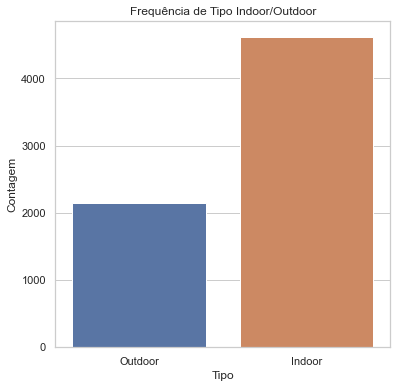

In [36]:
#Gráfico de barras que mostra a quantidade de casos em que cada tipo de coleta de sinal foi realizada ( indoor ou outdoor)

# Contagem de valores únicos em 'flag_indoor'
flag_indoor_count = df_train_alunos['flag_indoor'].value_counts()

# Plot de gráfico de barra
plt.figure(figsize=(6, 6))
sns.barplot(x=flag_indoor_count.index, y=flag_indoor_count.values)
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.title('Frequência de Tipo Indoor/Outdoor')
plt.xticks([0, 1], ['Outdoor', 'Indoor'])
plt.show()

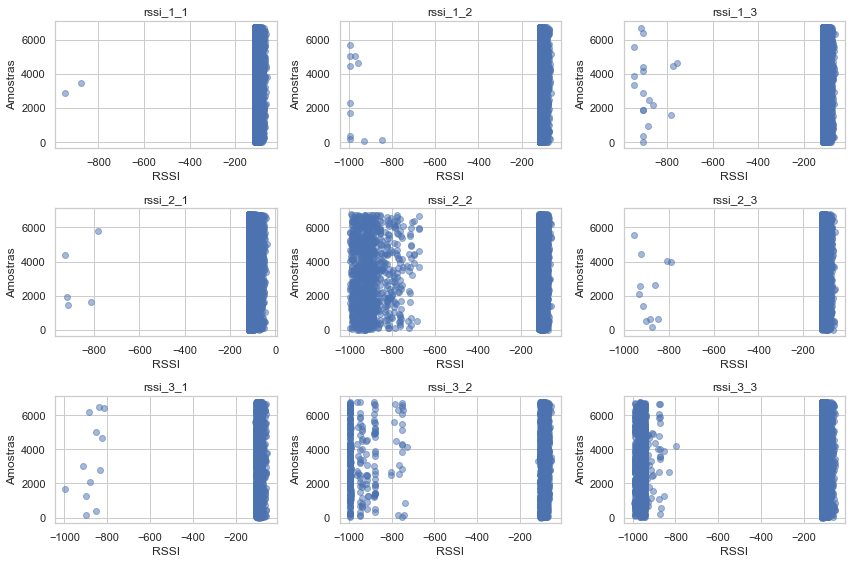

In [37]:
#Análise de outliers

# Selecionar as colunas relevantes para a análise
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']

# Plot de gráficos de dispersão para verificar outliers em cada coluna de RSSI
plt.figure(figsize=(12, 8))
for col in columns:
    plt.subplot(3, 3, columns.index(col) + 1)  # Organizar os subplots em uma grade 3x3
    plt.scatter(df_train_alunos[col], range(len(df_train_alunos)), alpha=0.5)
    plt.title(col)
    plt.xlabel('RSSI')
    plt.ylabel('Amostras')

plt.tight_layout()
plt.show()

In [38]:
# Substituir valores menores que -115 por nulo (NaN), evitando assim outliers.

columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']


df_train_alunos[columns] = df_train_alunos[columns].applymap(lambda x: x if x >= -115 else np.nan)

In [39]:
df_train_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6775 non-null   int64  
 1   id_ponto      6775 non-null   int64  
 2   rssi_1_1      4662 non-null   float64
 3   rssi_1_2      5271 non-null   float64
 4   rssi_1_3      4820 non-null   float64
 5   rssi_2_1      5641 non-null   float64
 6   rssi_2_2      4466 non-null   float64
 7   rssi_2_3      3615 non-null   float64
 8   rssi_3_1      4317 non-null   float64
 9   rssi_3_2      4697 non-null   float64
 10  rssi_3_3      5929 non-null   float64
 11  delay_1       6775 non-null   float64
 12  delay_2       6775 non-null   float64
 13  delay_3       6775 non-null   float64
 14  num_lat_bts   6775 non-null   float64
 15  num_long_bts  6775 non-null   float64
 16  flag_indoor   6775 non-null   bool   
dtypes: bool(1), float64(14), int64(2)
memory usage: 853.6 KB


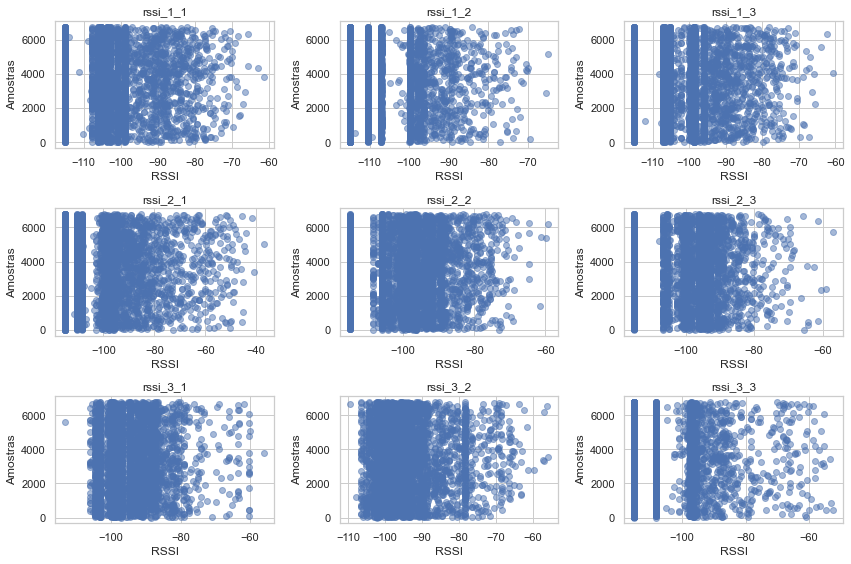

In [40]:
#Análise de outliers

# Selecionar as colunas relevantes para a análise
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']

# Plot de gráficos de dispersão para verificar outliers em cada coluna de RSSI
plt.figure(figsize=(12, 8))
for col in columns:
    plt.subplot(3, 3, columns.index(col) + 1)  # Organizar os subplots em uma grade 3x3
    plt.scatter(df_train_alunos[col], range(len(df_train_alunos)), alpha=0.5)
    plt.title(col)
    plt.xlabel('RSSI')
    plt.ylabel('Amostras')

plt.tight_layout()
plt.show()

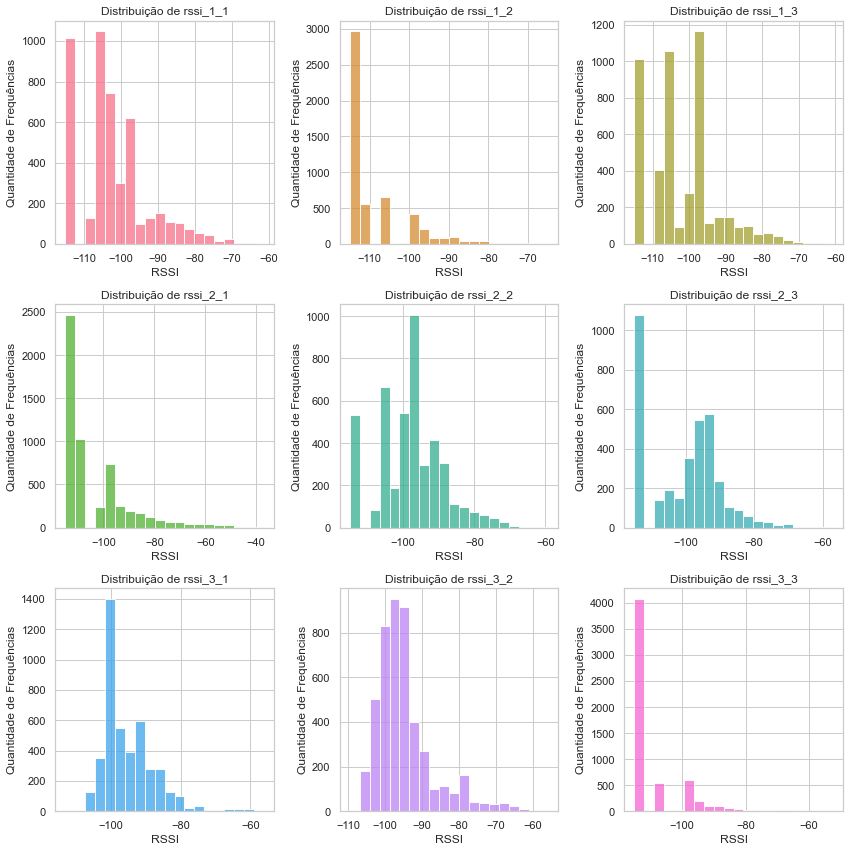

In [41]:
#Gráfico feito para entendermos melhor a distribuição dos dados, para tentarmos identificar padrões centrais ou outliers.

# Selecionar apenas as colunas relevantes para a análise
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']
data_selected = df_train_alunos[columns]

# Definir as cores
colors = sns.color_palette("husl", len(data_selected.columns))

# Criar subplots para cada coluna
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for col, ax, color in zip(data_selected.columns, axes.ravel(), colors):
    sns.histplot(data=data_selected[col], bins=20, kde=False, color=color, ax=ax)
    ax.set_xlabel('RSSI')
    ax.set_ylabel('Quantidade de Frequências')
    ax.set_title(f'Distribuição de {col}')

# Ajustar o layout para melhor espaçamento entre os subplots
plt.tight_layout()
plt.show()

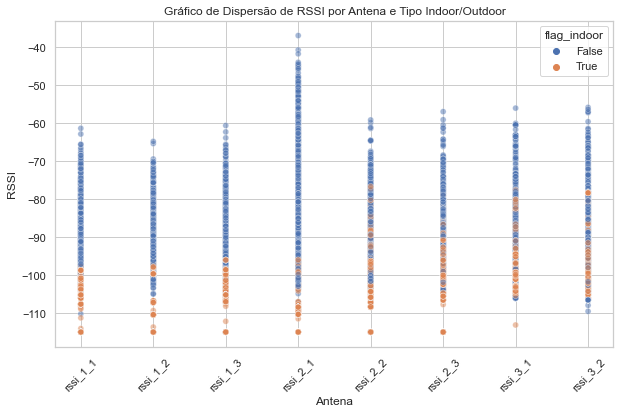

In [42]:
#O intuito do gráfico é a visualização da tendência do RSSI ao longo das antenas, e entendermos a correlação entre o valor do RSSI e a variável  indoor



# Derreter as colunas de RSSI e incluir a coluna 'flag_indoor'

columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']
df_melted = df_train_alunos.melt(id_vars=['flag_indoor'], value_vars=columns[:-1], value_name='RSSI', var_name='Antena')

# Configurar o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

# Plot do gráfico de dispersão para todos os pontos individuais
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Antena', y='RSSI', hue='flag_indoor', data=df_melted, alpha=0.5)
plt.xlabel('Antena')
plt.ylabel('RSSI')
plt.title('Gráfico de Dispersão de RSSI por Antena e Tipo Indoor/Outdoor')
plt.xticks(rotation=45)
plt.show()

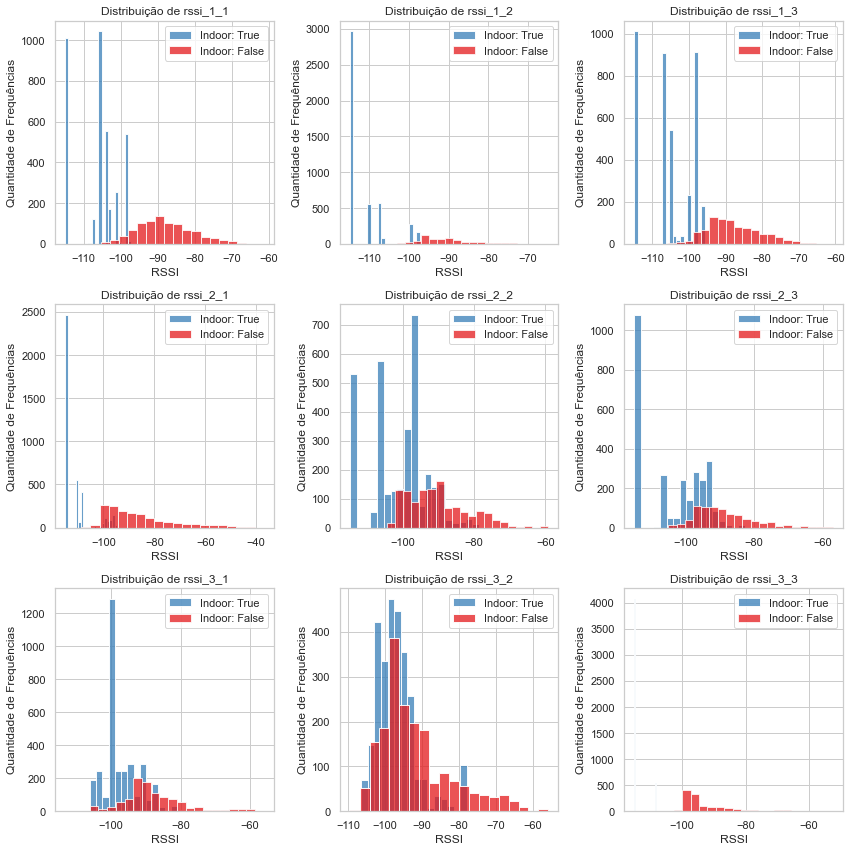

In [43]:
# Selecionar colunas relevantes e adicionar a coluna 'flag_indoor'
columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3', 'flag_indoor']
data_selected = df_train_alunos[columns]


# Criar subplots para cada coluna de RSSI
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for col, ax in zip(data_selected.columns[:-1], axes.ravel()):
    for indoor_flag in [True, False]:
        subset_data = data_selected[data_selected['flag_indoor'] == indoor_flag][col]
        sns.histplot(data=subset_data, bins=20, kde=False, color=sns.color_palette("Set1")[indoor_flag], ax=ax, label=f'Indoor: {indoor_flag}')
    ax.set_xlabel('RSSI')
    ax.set_ylabel('Quantidade de Frequências')
    ax.set_title(f'Distribuição de {col}')
    ax.legend()

# Ajustar o layout para melhor espaçamento entre os subplots
plt.tight_layout()
plt.show()

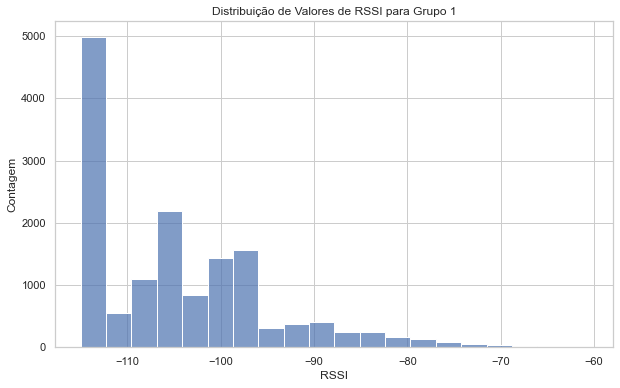

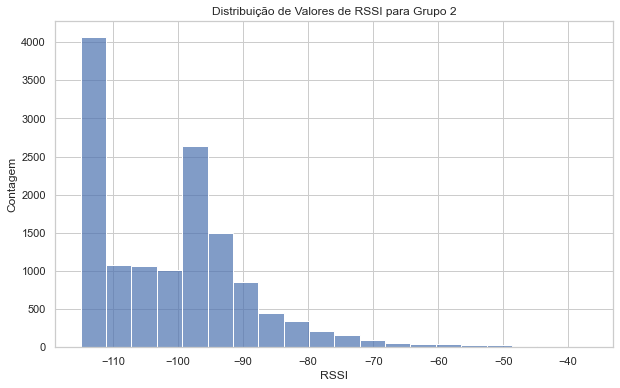

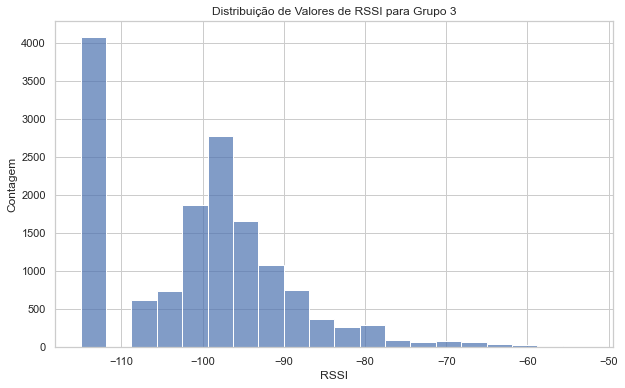

In [51]:
#Distribuição de valores de RSSi para os grupos de antenas 1,2,3


# Definir grupos e seus nomes correspondentes
group_mapping = {
    'Grupo 1': ['rssi_1_1', 'rssi_1_2', 'rssi_1_3'],
    'Grupo 2': ['rssi_2_1', 'rssi_2_2', 'rssi_2_3'],
    'Grupo 3': ['rssi_3_1', 'rssi_3_2', 'rssi_3_3']
}

# Gerar gráficos de distribuição separados para cada grupo
for group_name, group_columns in group_mapping.items():
    plt.figure(figsize=(10, 6))
    df_group = df_train_alunos[group_columns].melt(value_name='RSSI', var_name='Antena')
    sns.histplot(data=df_group, x='RSSI', bins=20, alpha=0.7, multiple='stack')
    plt.xlabel('RSSI')
    plt.ylabel('Contagem')
    plt.title(f'Distribuição de Valores de RSSI para {group_name}')
    plt.show()

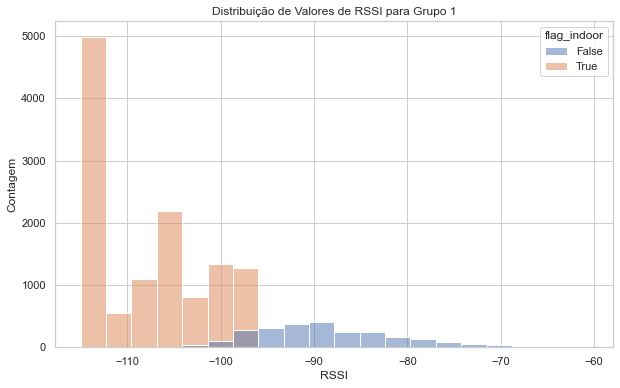

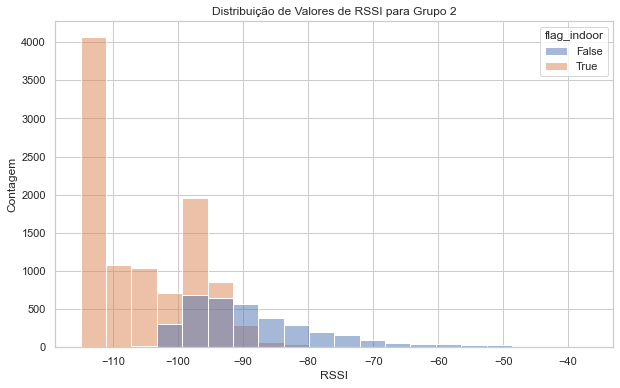

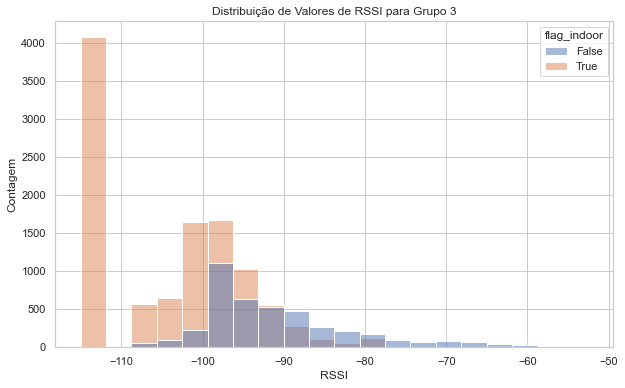

In [52]:
#Distribuição de valores de RSSi para os grupos de antenas 1,2,3 relacionadas à variável flag_indoor


# Definir grupos e seus nomes correspondentes
group_mapping = {
    'Grupo 1': ['rssi_1_1', 'rssi_1_2', 'rssi_1_3'],
    'Grupo 2': ['rssi_2_1', 'rssi_2_2', 'rssi_2_3'],
    'Grupo 3': ['rssi_3_1', 'rssi_3_2', 'rssi_3_3']
}

# Gerar gráficos de distribuição para cada grupo
for group_name, group_columns in group_mapping.items():
    df_group = df_train_alunos.melt(id_vars=['flag_indoor'], value_vars=group_columns, value_name='RSSI', var_name='Antena')
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_group, x='RSSI', hue='flag_indoor', bins=20, kde=False)
    plt.xlabel('RSSI')
    plt.ylabel('Contagem')
    plt.title(f'Distribuição de Valores de RSSI para {group_name}')


    plt.show()